# News Sentiment Demo
Also scratch space 

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os 
import re 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 

from util import *

%matplotlib inline
%config InlineBackend.figure_format='retina'

## On Individual Words...

In [3]:
sample_path = os.path.join('data/archive', 'df_1920.csv')
sample_data = open(sample_path, 'r').read()
sample_data[:100]

',year,sentence\n0,1920,"ROME, Jan. 2.--It is of the utmost importance that the Flume local situation '

In [4]:
# count_words_by_year 
count_words_by_year(1920)

new          20501
will         19520
yesterday    12641
today        12063
no           10298
             ...  
redner           1
astern           1
henryk           1
thetis           1
mushroom         1
Length: 70407, dtype: int64

In [5]:
# document_frequency 
print(document_frequency(1920, 'yesterday'))
print(document_frequency(1920, 'today'))

0.09131404785434073

We see right away although yesterday and today do not differ much in total occurrence, they have huge difference in the proportion of appearance in each news report. 

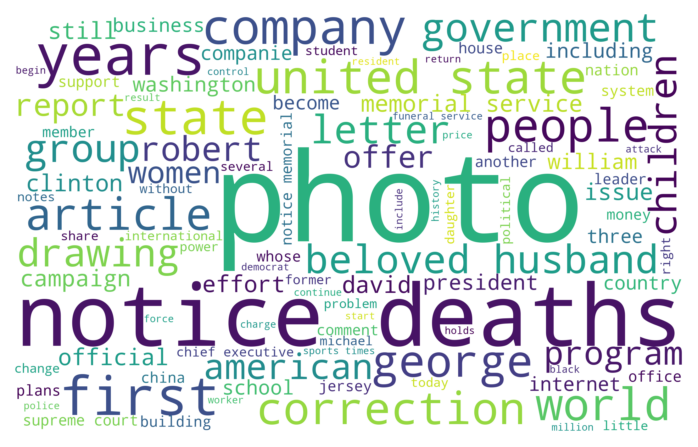

In [19]:
# example 
plot_word_cloud_of_year(2000)

## On sentiments!

In [30]:
# load sentiment analysis packages 
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment import SentimentIntensityAnalyzer
from text2emotion import get_emotion

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/andrewyang/nltk_data...


In [31]:
# load data in a dataframe 
sample_data_df = pd.read_csv(sample_path, index_col=0)
sample_data_df.head()

,year,sentence
0,1920,"ROME, Jan. 2.--It is of the utmost importance ..."
1,1920,FIND GIRL AND DOG DEAD.; Candy Near Bodies in...
2,1920,There was opened yesterday in the Art Departme...
3,1920,Free Champagne at the Vanderbilt.
4,1920,"20 Seized at Portland, Ore."


In [54]:
# TODO: RUN THIS BLOCK A COUPLE OF TIMES TO DECIDE!
# randomly select a sentence 
sample_sentence = sample_data_df.sample().sentence.iloc[0]
print(sample_sentence)
print()

# NLTK 
sia = SentimentIntensityAnalyzer()
print(sia.polarity_scores(sample_sentence))

# Text2Emotion
get_emotion(sample_sentence)

 Salesmen to Give Card Party

{'neg': 0.0, 'neu': 0.597, 'pos': 0.403, 'compound': 0.4019}


{'Happy': 0.0, 'Angry': 0.0, 'Surprise': 0.0, 'Sad': 0.0, 'Fear': 1.0}